In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_own_cleaned_train_data_v0.csv')

In [3]:
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet
0,0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN,ask native americans take
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND,home drunk url
2,2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN,amazon investigating chinese employees selling...
3,3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN,someone vetaken piece shit volcano
4,4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN,obama wanted liberals illegals move red states


In [4]:
df.shape

(13240, 7)

In [5]:
import nltk

In [6]:
from nltk.stem import SnowballStemmer

In [7]:
stemmer = SnowballStemmer("english")

In [8]:
def stem_sentence(sentence):
    words = str(sentence).split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

In [9]:
df['stemmed_tweet'] = df['cleaned_tweet'].apply(stem_sentence)

In [10]:
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stemmed_tweet
0,0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN,ask native americans take,ask nativ american take
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND,home drunk url,home drunk url
2,2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...
3,3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN,someone vetaken piece shit volcano,someon vetaken piec shit volcano
4,4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN,obama wanted liberals illegals move red states,obama want liber illeg move red state


In [11]:
df['subtask_a'].unique()

array(['OFF', 'NOT'], dtype=object)

In [12]:
df['subtask_a'] = pd.get_dummies(df['subtask_a'], drop_first=True).astype(int)

In [13]:
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stemmed_tweet
0,0,86426,@USER She should ask a few native Americans wh...,1,UNT,NaN,ask native americans take,ask nativ american take
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,TIN,IND,home drunk url,home drunk url
2,2,16820,Amazon is investigating Chinese employees who ...,0,NaN,NaN,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...
3,3,62688,"@USER Someone should'veTaken"" this piece of sh...",1,UNT,NaN,someone vetaken piece shit volcano,someon vetaken piec shit volcano
4,4,43605,@USER @USER Obama wanted liberals &amp; illega...,0,NaN,NaN,obama wanted liberals illegals move red states,obama want liber illeg move red state


In [14]:
df['subtask_b'].unique()

array(['UNT', 'TIN', nan], dtype=object)

In [15]:
import numpy as np
mapping = {np.nan:0,'UNT':1,'TIN':2}

In [16]:
df['subtask_b'] = df['subtask_b'].map(mapping)

In [17]:
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stemmed_tweet
0,0,86426,@USER She should ask a few native Americans wh...,1,1,NaN,ask native americans take,ask nativ american take
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,2,IND,home drunk url,home drunk url
2,2,16820,Amazon is investigating Chinese employees who ...,0,0,NaN,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...
3,3,62688,"@USER Someone should'veTaken"" this piece of sh...",1,1,NaN,someone vetaken piece shit volcano,someon vetaken piec shit volcano
4,4,43605,@USER @USER Obama wanted liberals &amp; illega...,0,0,NaN,obama wanted liberals illegals move red states,obama want liber illeg move red state


In [18]:
df['subtask_c'].unique()

array([nan, 'IND', 'OTH', 'GRP'], dtype=object)

In [19]:
mapping = {np.nan: 0, 'IND': 1, 'OTH': 2, 'GRP': 3}

In [20]:
df['subtask_c'] = df['subtask_c'].map(mapping)

In [21]:
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stemmed_tweet
0,0,86426,@USER She should ask a few native Americans wh...,1,1,0,ask native americans take,ask nativ american take
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,2,1,home drunk url,home drunk url
2,2,16820,Amazon is investigating Chinese employees who ...,0,0,0,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...
3,3,62688,"@USER Someone should'veTaken"" this piece of sh...",1,1,0,someone vetaken piece shit volcano,someon vetaken piec shit volcano
4,4,43605,@USER @USER Obama wanted liberals &amp; illega...,0,0,0,obama wanted liberals illegals move red states,obama want liber illeg move red state


In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Dropout, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from transformers import TFBertModel, BertTokenizer, TFBertForSequenceClassification

In [23]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture

In [24]:
def tokenize_data(texts, max_len=128):
    texts = str(texts)
    return tokenizer(
        texts,
        max_length=max_len,
        truncation=True,
        padding='max_length',
        return_tensors='tf'
    )

In [25]:
df['token'] = df['stemmed_tweet'].apply(tokenize_data)

In [26]:
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stemmed_tweet,token
0,0,86426,@USER She should ask a few native Americans wh...,1,1,0,ask native americans take,ask nativ american take,"[input_ids, token_type_ids, attention_mask]"
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,2,1,home drunk url,home drunk url,"[input_ids, token_type_ids, attention_mask]"
2,2,16820,Amazon is investigating Chinese employees who ...,0,0,0,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...,"[input_ids, token_type_ids, attention_mask]"
3,3,62688,"@USER Someone should'veTaken"" this piece of sh...",1,1,0,someone vetaken piece shit volcano,someon vetaken piec shit volcano,"[input_ids, token_type_ids, attention_mask]"
4,4,43605,@USER @USER Obama wanted liberals &amp; illega...,0,0,0,obama wanted liberals illegals move red states,obama want liber illeg move red state,"[input_ids, token_type_ids, attention_mask]"


In [27]:
def build_multitask_classification_model(max_len=128, bert_model_name='bert-base-uncased'):
    # Load the pre-trained BERT model without the classification head
    bert_model = TFBertModel.from_pretrained(bert_model_name)

    # Define the input layers
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
    attention_masks = Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')

    # Pass inputs to BERT model
    bert_outputs = bert_model({'input_ids': input_ids, 'attention_mask': attention_masks})

    # Get the pooled output from BERT
    sequence_output = bert_outputs.last_hidden_state
    pooled_output = tf.reduce_mean(sequence_output, axis=1)  # Mean pooling over the sequence

    # Define separate output layers for each subtask
    subtask_a_output = Dense(1, activation='sigmoid', name='subtask_a')(pooled_output)  # Binary classification (0, 1)
    subtask_b_output = Dense(3, activation='softmax', name='subtask_b')(pooled_output)  # 3 classes (0, 1, 2)
    subtask_c_output = Dense(4, activation='softmax', name='subtask_c')(pooled_output)  # 4 classes (0, 1, 2, 3)

    # Define the model with multiple outputs
    model = Model(inputs=[input_ids, attention_masks],
                  outputs=[subtask_a_output, subtask_b_output, subtask_c_output])

    # Compile the model with a loss function for each output
    model.compile(optimizer=Adam(learning_rate=2e-5),
                  loss={'subtask_a': 'binary_crossentropy',
                        'subtask_b': 'sparse_categorical_crossentropy',
                        'subtask_c': 'sparse_categorical_crossentropy'},
                  metrics={'subtask_a': 'accuracy',
                           'subtask_b': 'accuracy',
                           'subtask_c': 'accuracy'})

    return model

In [28]:
model = build_multitask_classification_model(max_len=128)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [29]:
import numpy as np

# Extracting input_ids and attention_mask from the token column
input_ids = np.array([token['input_ids'] for token in df['token']])
attention_mask = np.array([token['attention_mask'] for token in df['token']])

# Extracting labels for each subtask
subtask_a_labels = np.array(df['subtask_a'])  # Binary labels (0 and 1)
subtask_b_labels = np.array(df['subtask_b'])  # Multi-class labels (0, 1, 2)
subtask_c_labels = np.array(df['subtask_c'])  # Multi-class labels (0, 1, 2, 3)

In [30]:
input_ids = np.squeeze(input_ids, axis=1)
attention_mask = np.squeeze(attention_mask, axis=1)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train_ids, X_val_ids, X_train_mask, X_val_mask, y_train_a, y_val_a, y_train_b, y_val_b, y_train_c, y_val_c = train_test_split(
    input_ids,
    attention_mask,
    subtask_a_labels,
    subtask_b_labels,
    subtask_c_labels,
    test_size=0.1,
    random_state=42
)

In [34]:
history = model.fit(
    [X_train_ids, X_train_mask],  # Input data
    {'subtask_a': y_train_a, 'subtask_b': y_train_b, 'subtask_c': y_train_c},  # Training labels for each subtask
    validation_data=(
        [X_val_ids, X_val_mask],  # Validation input data
        {'subtask_a': y_val_a, 'subtask_b': y_val_b, 'subtask_c': y_val_c}  # Validation labels for each subtask
    ),
    epochs=3,
    batch_size=64
)

Epoch 1/3
187/187 [==============================] - 1166s 6s/step - loss: 1.7749 - subtask_a_loss: 0.4719 - subtask_b_loss: 0.5861 - subtask_c_loss: 0.7169 - subtask_a_accuracy: 0.7821 - subtask_b_accuracy: 0.7568 - subtask_c_accuracy: 0.7352 - val_loss: 1.7813 - val_subtask_a_loss: 0.4665 - val_subtask_b_loss: 0.5992 - val_subtask_c_loss: 0.7156 - val_subtask_a_accuracy: 0.7825 - val_subtask_b_accuracy: 0.7636 - val_subtask_c_accuracy: 0.7334
Epoch 2/3
187/187 [==============================] - 1144s 6s/step - loss: 1.5387 - subtask_a_loss: 0.4004 - subtask_b_loss: 0.5081 - subtask_c_loss: 0.6302 - subtask_a_accuracy: 0.8187 - subtask_b_accuracy: 0.7938 - subtask_c_accuracy: 0.7646 - val_loss: 1.7776 - val_subtask_a_loss: 0.4678 - val_subtask_b_loss: 0.5976 - val_subtask_c_loss: 0.7122 - val_subtask_a_accuracy: 0.7787 - val_subtask_b_accuracy: 0.7666 - val_subtask_c_accuracy: 0.7387
Epoch 3/3
187/187 [==============================] - 1144s 6s/step - loss: 1.2838 - subtask_a_loss: 0.

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [44]:
history = model.fit(
    [X_train_ids, X_train_mask],  # Input data
    {'subtask_a': y_train_a, 'subtask_b': y_train_b, 'subtask_c': y_train_c},  # Training labels for each subtask
    validation_data=(
        [X_val_ids, X_val_mask],  # Validation input data
        {'subtask_a': y_val_a, 'subtask_b': y_val_b, 'subtask_c': y_val_c}  # Validation labels for each subtask
    ),
    epochs=3,
    batch_size=64,
    callbacks=[early_stopping]
)

Epoch 1/3
187/187 [==============================] - 1130s 6s/step - loss: 0.9740 - subtask_a_loss: 0.2262 - subtask_b_loss: 0.3153 - subtask_c_loss: 0.4325 - subtask_a_accuracy: 0.9050 - subtask_b_accuracy: 0.8793 - subtask_c_accuracy: 0.8441 - val_loss: 2.1710 - val_subtask_a_loss: 0.5963 - val_subtask_b_loss: 0.7419 - val_subtask_c_loss: 0.8329 - val_subtask_a_accuracy: 0.7779 - val_subtask_b_accuracy: 0.7538 - val_subtask_c_accuracy: 0.7258
Epoch 2/3
187/187 [==============================] - 1130s 6s/step - loss: 0.6898 - subtask_a_loss: 0.1411 - subtask_b_loss: 0.2155 - subtask_c_loss: 0.3332 - subtask_a_accuracy: 0.9443 - subtask_b_accuracy: 0.9210 - subtask_c_accuracy: 0.8749 - val_loss: 2.6942 - val_subtask_a_loss: 0.7743 - val_subtask_b_loss: 0.9414 - val_subtask_c_loss: 0.9784 - val_subtask_a_accuracy: 0.7779 - val_subtask_b_accuracy: 0.7538 - val_subtask_c_accuracy: 0.7205
Epoch 3/3
187/187 [==============================] - 1127s 6s/step - loss: 0.5446 - subtask_a_loss: 0.

In [45]:
model.save('new_BERT.h5')

In [46]:
from google.colab import files
files.download('new_BERT.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

START

In [26]:
from transformers import TFBertForSequenceClassification, TFBertModel, BertTokenizer
from tensorflow.keras.models import load_model

model = load_model('new_BERT.h5', custom_objects={
    'TFBertModel': TFBertModel,
    'TFBertForSequenceClassification': TFBertForSequenceClassification
})

In [13]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [14]:
def tokenize_data(texts, max_len=128):
    texts = str(texts)
    return tokenizer(
        texts,
        max_length=max_len,
        truncation=True,
        padding='max_length',
        return_tensors='tf'
    )

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import numpy as np

In [17]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [18]:
def remove_stopwords(sentence):
    words = sentence.split()
    filtered = ' '.join(word for word in words if word not in stop_words)
    return filtered

In [19]:
def stem_sentence(sentence):
    words = sentence.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

In [20]:
sentence = "He is a bastard"
stop = remove_stopwords(sentence)
stem = stem_sentence(stop)
tokenized = tokenize_data(stem)

In [21]:
input_id = tokenized['input_ids']
attention_mask = tokenized['attention_mask']

In [22]:
prediction = model.predict([input_id,attention_mask])

1/1 [==============================] - 9s 9s/step


In [23]:
prediction

[array([[0.9920467]], dtype=float32),
 array([[0.00452056, 0.03294776, 0.9625317 ]], dtype=float32),
 array([[0.0578385 , 0.89629024, 0.02526963, 0.02060162]], dtype=float32)]

In [24]:
def print_classifications(predictions):
    for i, array in enumerate(predictions):
        if i == 0:
          if array > 0.5:
            print('Hate')
          else:
            print('Not Hate')

        if i == 1:
          map = {0: 'Neither', 1: 'Untargeted', 2: 'Targeted'}
          maximum = np.argmax(array)
          rounded = np.round(maximum)
          print(map[rounded])

        if i == 2:
          map = {0: 'Neither', 1: 'Individual', 2: 'Other', 3: 'Group'}
          maximum = np.argmax(array)
          rounded = np.round(maximum)
          print(map[rounded])

In [25]:
print_classifications(prediction)

Hate
Targeted
Individual


In [15]:
from PIL import Image
import pytesseract
import cv2
import numpy as np

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def get_text(image):

    image_path = image  
    image = cv2.imread(image_path)
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    _, threshold_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)
    
    processed_text = pytesseract.image_to_string(threshold_image)

    result = ' '.join(processed_text.split())
    
    return result 

In [16]:
text = get_text('hate.jpg')

In [17]:
print(text)

ME LEAVING THE HOUSE | hate people.


In [18]:
sentence = text
stop = remove_stopwords(sentence)
stem = stem_sentence(stop)
tokenized = tokenize_data(stem)

In [19]:
input_id = tokenized['input_ids']
attention_mask = tokenized['attention_mask']

In [20]:
prediction = model.predict([input_id,attention_mask])

1/1 [==============================] - 0s 245ms/step


In [21]:
def print_classifications(predictions):
    for i, array in enumerate(predictions):
        if i == 0:
          if array > 0.5:
            print('Hate')
          else:
            print('Not Hate')

        if i == 1:
          map = {0: 'Neither', 1: 'Untargeted', 2: 'Targeted'}
          maximum = np.argmax(array)
          rounded = np.round(maximum)
          print(map[rounded])

        if i == 2:
          map = {0: 'Neither', 1: 'Individual', 2: 'Other', 3: 'Group'}
          maximum = np.argmax(array)
          rounded = np.round(maximum)
          print(map[rounded])

In [22]:
print_classifications(prediction)

Hate
Targeted
Neither


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
batch_size = 16
epochs = 10

In [25]:
train_data_dir = 'Image_dataset/' 

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 1072 images belonging to 3 classes.
Found 118 images belonging to 3 classes.


In [26]:
image_model = load_model('image.h5')

In [27]:
from tensorflow.keras.utils import load_img, img_to_array

In [28]:
import tensorflow as tf
img_path = 'smoking.jpg'  
img = load_img(img_path, target_size=(224, 224))  # Resize the image to the target size
img_array = img_to_array(img)  # Convert the image to a numpy array
img_array = tf.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array = img_array / 255.0  # Rescale the image if you used rescaling during training

In [29]:
predictions = image_model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

gesture_labels = ['Blood and Gore','Drugs','Sexual content'] 
predicted_gesture = gesture_labels[predicted_class[0]]

1/1 [==============================] - 14s 14s/step


In [30]:
print(predicted_gesture)

Drugs


END

In [96]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [97]:
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
batch_size = 16
epochs = 10

In [98]:
train_data_dir = 'Image_dataset/' 

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 1072 images belonging to 3 classes.
Found 118 images belonging to 3 classes.


In [99]:
from tensorflow.keras.applications import MobileNet

In [100]:
mobilenet = MobileNet(weights='imagenet',include_top=False,input_shape=input_shape)

In [101]:
for layer in mobilenet.layers:
    layer.trainable = False

In [102]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [103]:
model = Sequential([
    mobilenet,
    
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [104]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',   # Metric to monitor
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
    verbose=1,            # Verbosity mode
    mode='min'            # Mode can be 'min', 'max', or 'auto'
)

In [106]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        epochs=epochs,
        callbacks=[early_stopping]
    )

Epoch 1/10
30/67 [============>.................] - ETA: 32s - loss: 0.7194 - accuracy: 0.6729

E:\Anaconda\envs\myenv\lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


67/67 [==============================] - 90s 1s/step - loss: 0.5081 - accuracy: 0.7910 - val_loss: 0.4254 - val_accuracy: 0.8571
Epoch 2/10
67/67 [==============================] - 44s 652ms/step - loss: 0.1502 - accuracy: 0.9431 - val_loss: 0.9130 - val_accuracy: 0.7500
Epoch 3/10
67/67 [==============================] - 41s 618ms/step - loss: 0.0920 - accuracy: 0.9683 - val_loss: 0.4535 - val_accuracy: 0.8304
Epoch 4/10
67/67 [==============================] - 41s 614ms/step - loss: 0.0456 - accuracy: 0.9841 - val_loss: 0.5069 - val_accuracy: 0.8750
Epoch 5/10
67/67 [==============================] - 41s 609ms/step - loss: 0.0622 - accuracy: 0.9785 - val_loss: 0.4805 - val_accuracy: 0.8571
Epoch 6/10
67/67 [==============================] - 41s 615ms/step - loss: 0.0387 - accuracy: 0.9869 - val_loss: 0.6576 - val_accuracy: 0.8214
Epoch 6: early stopping


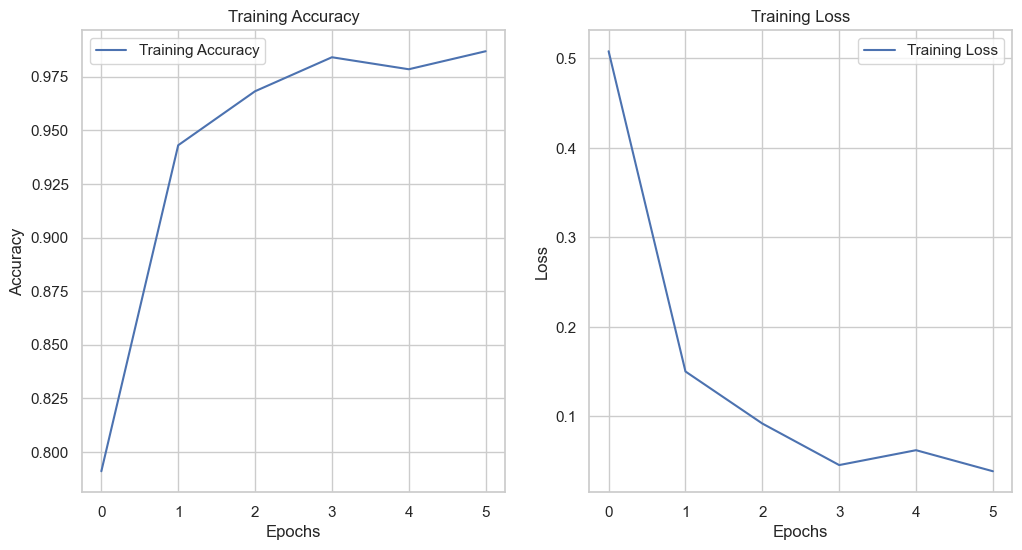

In [119]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result from model.fit
history_dict = history.history

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

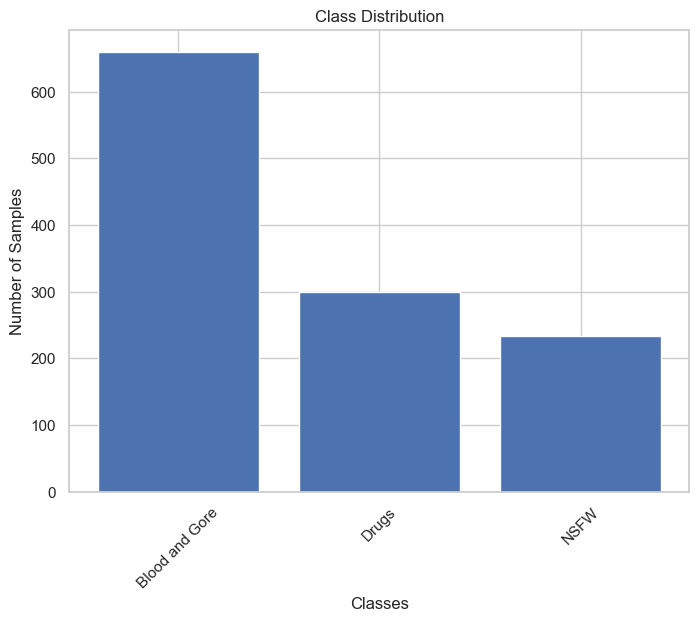

In [111]:
import os

# Count the number of samples in each class directory
class_counts = {class_name: len(os.listdir(os.path.join(train_data_dir, class_name))) 
                for class_name in os.listdir(train_data_dir)}

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

In [63]:
model.save('image.h5')

DAV

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   del            13240 non-null  int64 
 1   id             13240 non-null  int64 
 2   tweet          13240 non-null  object
 3   subtask_a      13240 non-null  object
 4   subtask_b      4400 non-null   object
 5   subtask_c      3876 non-null   object
 6   cleaned_tweet  13156 non-null  object
dtypes: int64(2), object(5)
memory usage: 724.2+ KB
None
   del     id                                              tweet subtask_a  \
0    0  86426  @USER She should ask a few native Americans wh...       OFF   
1    1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...       OFF   
2    2  16820  Amazon is investigating Chinese employees who ...       NOT   
3    3  62688  @USER Someone should'veTaken" this piece of sh...       OFF   
4    4  43605  @USER @USER Obama wanted liberals &amp; ill

C:\Users\harir\AppData\Local\Temp\ipykernel_75888\3162701434.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subtask_a', data=data, ax=axes[0], palette="pastel")
C:\Users\harir\AppData\Local\Temp\ipykernel_75888\3162701434.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subtask_b', data=data, ax=axes[1], palette="pastel")
C:\Users\harir\AppData\Local\Temp\ipykernel_75888\3162701434.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subtask_c', data=data, ax=axes[2], palette="pastel")


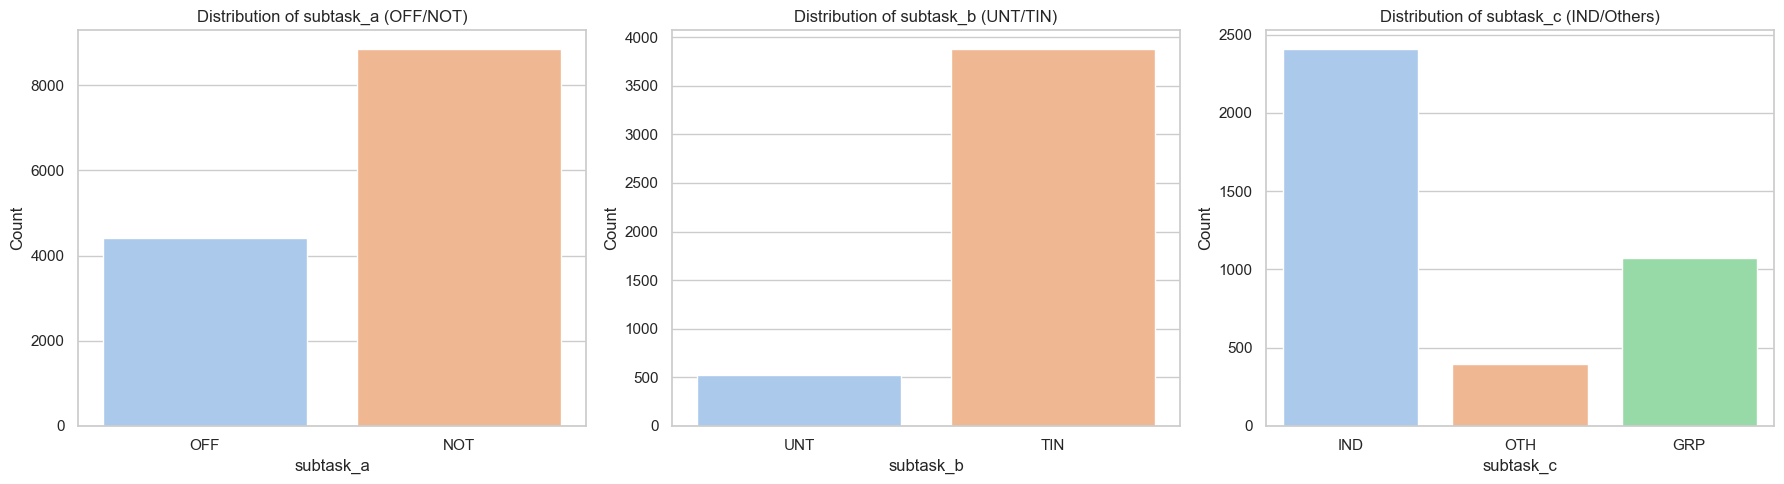

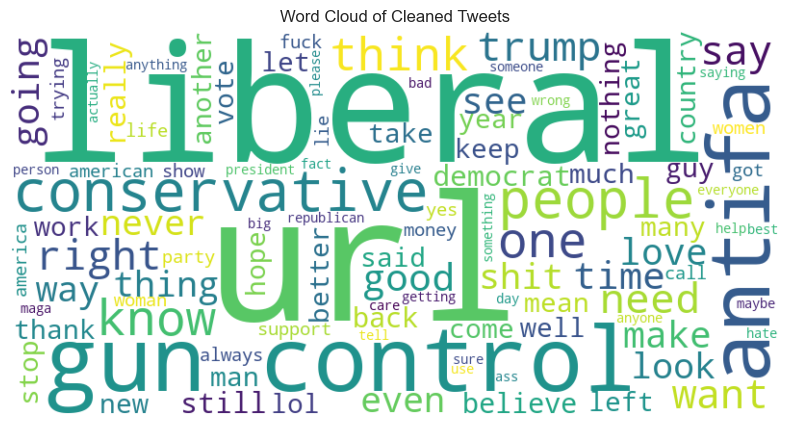

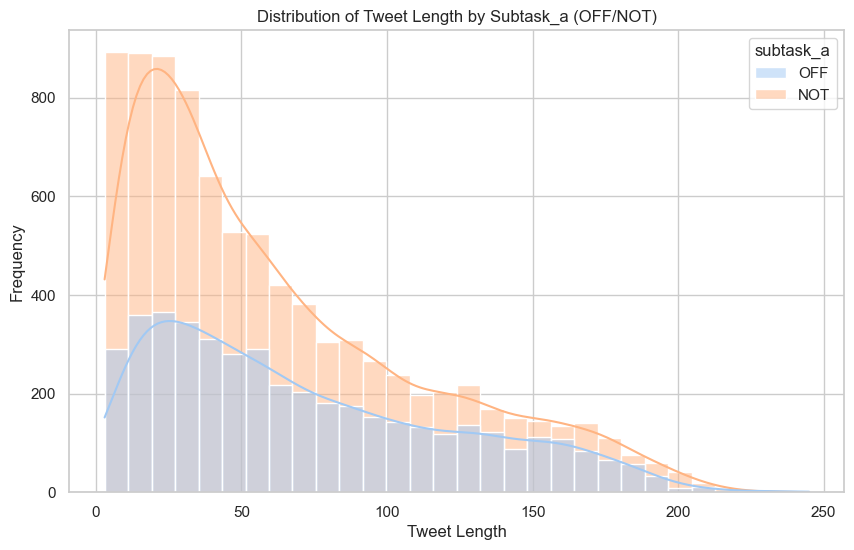

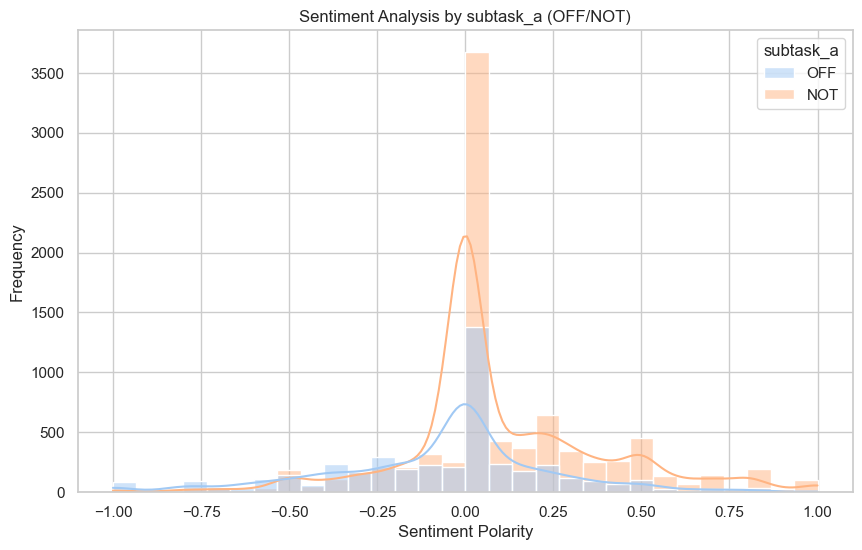

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv('cleaned_train_data_v0.csv')  

# Display basic info
print(data.info())
print(data.head())

# Set up seaborn style
sns.set(style="whitegrid")

# --- 1. Distribution Analysis ---

# Define figure and axis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot distribution for 'subtask_a'
sns.countplot(x='subtask_a', data=data, ax=axes[0], palette="pastel")
axes[0].set_title('Distribution of subtask_a (OFF/NOT)')
axes[0].set_xlabel('subtask_a')
axes[0].set_ylabel('Count')

# Plot distribution for 'subtask_b'
sns.countplot(x='subtask_b', data=data, ax=axes[1], palette="pastel")
axes[1].set_title('Distribution of subtask_b (UNT/TIN)')
axes[1].set_xlabel('subtask_b')
axes[1].set_ylabel('Count')

# Plot distribution for 'subtask_c'
sns.countplot(x='subtask_c', data=data, ax=axes[2], palette="pastel")
axes[2].set_title('Distribution of subtask_c (IND/Others)')
axes[2].set_xlabel('subtask_c')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# --- 2. Word Cloud for Cleaned Tweets ---

# Combine all cleaned tweets into one text
all_text = " ".join(text for text in data['cleaned_tweet'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=100, colormap="viridis").generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Cleaned Tweets")
plt.show()

# --- 3. Tweet Length Analysis ---

# Calculate the length of each tweet in 'cleaned_tweet'
data['tweet_length'] = data['cleaned_tweet'].dropna().apply(len)

# Plot distribution of tweet length for each class in subtask_a
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='tweet_length', hue='subtask_a', kde=True, palette="pastel", bins=30)
plt.title("Distribution of Tweet Length by Subtask_a (OFF/NOT)")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()

# --- 4. Sentiment Analysis (Optional, if you have the necessary libraries) ---

# You may need to install TextBlob or another NLP library for sentiment analysis:
# pip install textblob

from textblob import TextBlob

# Apply sentiment analysis
data['sentiment'] = data['cleaned_tweet'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution by subtask_a
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='sentiment', hue='subtask_a', kde=True, palette="pastel", bins=30)
plt.title("Sentiment Analysis by subtask_a (OFF/NOT)")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

In [36]:
data = pd.read_csv('cleaned_train_data_v0.csv')

In [37]:
df = pd.DataFrame(data)

In [38]:
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet
0,0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN,ask native americans take
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND,home drunk url
2,2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN,amazon investigating chinese employees selling...
3,3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN,someone vetaken piece shit volcano
4,4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN,obama wanted liberals illegals move red states


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   del            13240 non-null  int64 
 1   id             13240 non-null  int64 
 2   tweet          13240 non-null  object
 3   subtask_a      13240 non-null  object
 4   subtask_b      4400 non-null   object
 5   subtask_c      3876 non-null   object
 6   cleaned_tweet  13156 non-null  object
dtypes: int64(2), object(5)
memory usage: 724.2+ KB


In [46]:
df['subtask_a'] = pd.get_dummies(df['subtask_a'], drop_first=True).astype(int)

mapping = {np.nan:0,'UNT':1,'TIN':2}
df['subtask_b'] = df['subtask_b'].map(mapping)

mapping = {np.nan: 0, 'IND': 1, 'OTH': 2, 'GRP': 3}
df['subtask_c'] = df['subtask_c'].map(mapping)

df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet
0,0,86426,@USER She should ask a few native Americans wh...,1,1,0,ask native americans take
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,2,1,home drunk url
2,2,16820,Amazon is investigating Chinese employees who ...,0,0,0,amazon investigating chinese employees selling...
3,3,62688,"@USER Someone should'veTaken"" this piece of sh...",1,1,0,someone vetaken piece shit volcano
4,4,43605,@USER @USER Obama wanted liberals &amp; illega...,0,0,0,obama wanted liberals illegals move red states


In [47]:
import nltk
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def stem_sentence(sentence):
    words = str(sentence).split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

df['stemmed_tweet'] = df['cleaned_tweet'].apply(stem_sentence)

In [48]:
df['tweet_length'] = df['tweet'].apply(lambda x: len(x.split()))

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   del            13240 non-null  int64 
 1   id             13240 non-null  int64 
 2   tweet          13240 non-null  object
 3   subtask_a      13240 non-null  int32 
 4   subtask_b      13240 non-null  int64 
 5   subtask_c      13240 non-null  int64 
 6   cleaned_tweet  13156 non-null  object
 7   stemmed_tweet  13240 non-null  object
 8   tweet_length   13240 non-null  int64 
dtypes: int32(1), int64(5), object(3)
memory usage: 879.3+ KB


In [50]:
df['cleaned_tweet'] = df['cleaned_tweet'].astype(str)
df['stemmed_tweet'] = df['stemmed_tweet'].astype(str)

# Remove the substrings 'url' and 'user' from both columns
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'\b(url|user)\b', '', regex=True)
df['stemmed_tweet'] = df['stemmed_tweet'].str.replace(r'\b(url|user)\b', '', regex=True)

In [51]:
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stemmed_tweet,tweet_length
0,0,86426,@USER She should ask a few native Americans wh...,1,1,0,ask native americans take,ask nativ american take,14
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,2,1,home drunk,home drunk,11
2,2,16820,Amazon is investigating Chinese employees who ...,0,0,0,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...,27
3,3,62688,"@USER Someone should'veTaken"" this piece of sh...",1,1,0,someone vetaken piece shit volcano,someon vetaken piec shit volcano,11
4,4,43605,@USER @USER Obama wanted liberals &amp; illega...,0,0,0,obama wanted liberals illegals move red states,obama want liber illeg move red state,12


In [77]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score for a tweet
def get_sentiment_score(tweet):
    # Get sentiment score using VADER
    sentiment = analyzer.polarity_scores(tweet)
    # The compound score is what we are interested in (it ranges from -1 to 1)
    return sentiment['compound']

# Apply the sentiment analysis function to the cleaned_tweet column
df['sentiment_score'] = df['cleaned_tweet'].apply(get_sentiment_score)

# Display the updated DataFrame with sentiment scores
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stemmed_tweet,tweet_length,sentiment_score
0,0,86426,@USER She should ask a few native Americans wh...,1,1,0,ask native americans take,ask nativ american take,14,0.0000
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,2,1,home drunk,home drunk,11,-0.3400
2,2,16820,Amazon is investigating Chinese employees who ...,0,0,0,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...,27,0.6249
3,3,62688,"@USER Someone should'veTaken"" this piece of sh...",1,1,0,someone vetaken piece shit volcano,someon vetaken piec shit volcano,11,-0.5574
4,4,43605,@USER @USER Obama wanted liberals &amp; illega...,0,0,0,obama wanted liberals illegals move red states,obama want liber illeg move red state,12,0.0000


In [63]:
# Import the required library
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [94]:
positive_reviews = df[df['subtask_a'] == 1]['cleaned_tweet'].dropna()
negative_reviews = df[df['subtask_a'] == 0]['cleaned_tweet'].dropna()

# Check if reviews are non-empty
positive_reviews = positive_reviews[positive_reviews.str.strip() != '']
negative_reviews = negative_reviews[negative_reviews.str.strip() != '']

# Ensure the vectorizer is imported and defined
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=None)  # or use a custom list if needed

# Convert reviews to TF-IDF vectors
if not positive_reviews.empty and not negative_reviews.empty:
    positive_tfidf = tfidf_vectorizer.fit_transform(positive_reviews).toarray()
    negative_tfidf = tfidf_vectorizer.fit_transform(negative_reviews).toarray()

    # Perform t-test to compare the average TF-IDF scores between the two groups
    stat, p_value = ttest_ind(positive_tfidf.mean(axis=0), negative_tfidf.mean(axis=0))

    print(f"T-statistic: {stat}")
    print(f"P-value: {p_value}")
else:
    print("One of the review sets is empty or only contains stop words.")

T-statistic: 12.812741951828539
P-value: 1.8734308075859604e-37


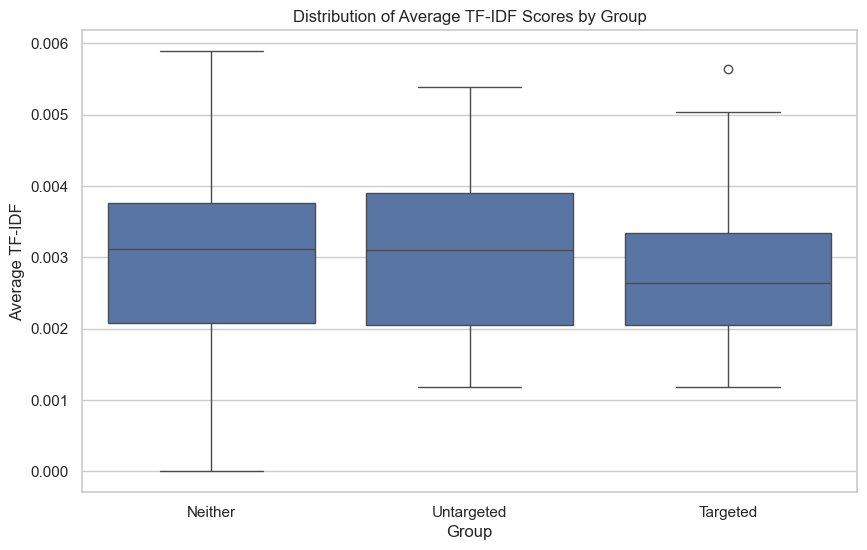

ANOVA F-statistic: 0.7571973296164418
ANOVA p-value: 0.47049194731712873
There is no statistically significant difference in the average TF-IDF scores between the groups.


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import f_oneway
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a DataFrame 'df' with 'subtask_b' (label) and 'stemmed_tweet' (text) columns
neither_reviews = df[df['subtask_b'] == 0]['stemmed_tweet'][:60]
untargeted_reviews = df[df['subtask_b'] == 1]['stemmed_tweet'][:60]
targeted_reviews = df[df['subtask_b'] == 2]['stemmed_tweet'][:60]

# Step 1: Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the reviews into TF-IDF vectors (for all three groups together to ensure same feature space)
all_reviews = pd.concat([neither_reviews, untargeted_reviews, targeted_reviews])

# Transform all reviews into the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(all_reviews).toarray()

# Step 2: Split the TF-IDF matrix back into the groups
neither_tfidf = tfidf_matrix[:len(neither_reviews)]
untargeted_tfidf = tfidf_matrix[len(neither_reviews):len(neither_reviews) + len(untargeted_reviews)]
targeted_tfidf = tfidf_matrix[len(neither_reviews) + len(untargeted_reviews):]

# Step 3: Compute the average TF-IDF scores for each review in each group
neither_avg_tfidf = neither_tfidf.mean(axis=1)  # Average TF-IDF scores for each review
untargeted_avg_tfidf = untargeted_tfidf.mean(axis=1)  # Average TF-IDF scores for each review
targeted_avg_tfidf = targeted_tfidf.mean(axis=1)  # Average TF-IDF scores for each review

# Create a DataFrame for plotting
df_tfidf = pd.DataFrame({
    'Group': ['Neither'] * len(neither_avg_tfidf) +
             ['Untargeted'] * len(untargeted_avg_tfidf) +
             ['Targeted'] * len(targeted_avg_tfidf),
    'Average TF-IDF': list(neither_avg_tfidf) +
                      list(untargeted_avg_tfidf) +
                      list(targeted_avg_tfidf)
})

# Step 4: Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Average TF-IDF', data=df_tfidf)
plt.title('Distribution of Average TF-IDF Scores by Group')
plt.show()

# Step 5: Perform one-way ANOVA between the three groups
f_statistic, p_value = f_oneway(neither_avg_tfidf, untargeted_avg_tfidf, targeted_avg_tfidf)

# Step 6: Interpret the results
print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA p-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in the average TF-IDF scores between the groups.")
else:
    print("There is no statistically significant difference in the average TF-IDF scores between the groups.")

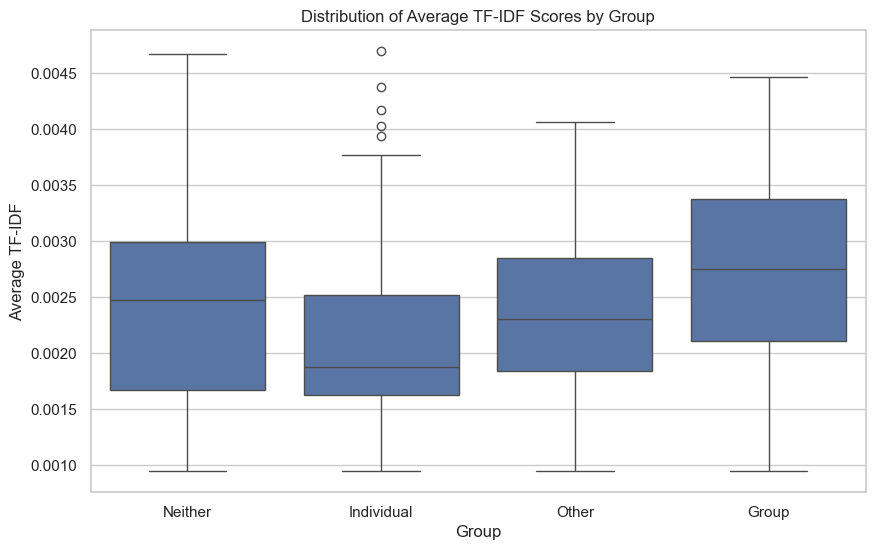

ANOVA F-statistic: 3.7185305493480465
ANOVA p-value: 0.01215005832346263
There is a statistically significant difference in the average TF-IDF scores between the groups.


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import f_oneway
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a DataFrame 'df' with 'subtask_c' (label) and 'stemmed_tweet' (text) columns
neither_reviews = df[df['subtask_c'] == 0]['stemmed_tweet'][:60]
individual_reviews = df[df['subtask_c'] == 1]['stemmed_tweet'][:60]
other_reviews = df[df['subtask_c'] == 2]['stemmed_tweet'][:60]
group_reviews = df[df['subtask_c'] == 3]['stemmed_tweet'][:60]

# Step 1: Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the reviews into TF-IDF vectors (for all four groups together to ensure the same feature space)
all_reviews = pd.concat([neither_reviews, individual_reviews, other_reviews, group_reviews])

# Transform all reviews into the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(all_reviews).toarray()

# Step 2: Split the TF-IDF matrix back into the groups
neither_tfidf = tfidf_matrix[:len(neither_reviews)]
individual_tfidf = tfidf_matrix[len(neither_reviews):len(neither_reviews) + len(individual_reviews)]
other_tfidf = tfidf_matrix[len(neither_reviews) + len(individual_reviews):len(neither_reviews) + len(individual_reviews) + len(other_reviews)]
group_tfidf = tfidf_matrix[len(neither_reviews) + len(individual_reviews) + len(other_reviews):]

# Step 3: Compute the average TF-IDF scores for each review in each group
neither_avg_tfidf = neither_tfidf.mean(axis=1)  # Average TF-IDF scores for each review
individual_avg_tfidf = individual_tfidf.mean(axis=1)  # Average TF-IDF scores for each review
other_avg_tfidf = other_tfidf.mean(axis=1)  # Average TF-IDF scores for each review
group_avg_tfidf = group_tfidf.mean(axis=1)  # Average TF-IDF scores for each review

# Create a DataFrame for plotting
df_tfidf = pd.DataFrame({
    'Group': ['Neither'] * len(neither_avg_tfidf) +
             ['Individual'] * len(individual_avg_tfidf) +
             ['Other'] * len(other_avg_tfidf) +
             ['Group'] * len(group_avg_tfidf),
    'Average TF-IDF': list(neither_avg_tfidf) +
                      list(individual_avg_tfidf) +
                      list(other_avg_tfidf) +
                      list(group_avg_tfidf)
})

# Step 4: Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Average TF-IDF', data=df_tfidf)
plt.title('Distribution of Average TF-IDF Scores by Group')
plt.show()

# Step 5: Perform one-way ANOVA between the four groups
f_statistic, p_value = f_oneway(neither_avg_tfidf, individual_avg_tfidf, other_avg_tfidf, group_avg_tfidf)

# Step 6: Interpret the results
print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA p-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in the average TF-IDF scores between the groups.")
else:
    print("There is no statistically significant difference in the average TF-IDF scores between the groups.")